### **Part-1-b**
 
Driver profiling is a critical component for reliability analysis + optimization. Given the dataset, can you identify metrics that can measure driver performance/preferences? Can you then compute these metrics for each driver to create individual performance profiles? (an example of a performance metric would be **Assignment to completion ratio (ACR) =
total_completed_trips/total_assigned_requests)**.

Can you **plot** the distributions of the metrics you identified?

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### **Loading Data**

In [ ]:
df_request = pd.read_csv('/content/drive/My Drive/pathao_assignment/raw_request_dataset.csv')
df_completed = pd.read_csv('/content/drive/My Drive/pathao_assignment/monthly_completed_trip.csv')
df_ride = pd.read_csv('/content/drive/My Drive/pathao_assignment/driver_ride_assignments.csv')


In [ ]:
df_request.shape


(106139, 11)

In [ ]:
df_completed.shape

(4797, 2)

In [ ]:
df_ride.shape

(238559, 2)

In [ ]:
df_request.head()

,day_of_week,Hour,Minute,ride_id,passenger_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status
0,1,5,48,78A5RS,4194635,5271687,121.0,NaN,651.0,6077.0,COMPLETED
1,1,7,37,78A9FQ,5390069,3801157,116.0,NaN,1375.0,5733.0,COMPLETED
2,1,7,47,78AACQ,3750224,5102685,194.0,4.0,1566.0,10913.0,COMPLETED
3,1,8,27,78AFLP,4419899,4869168,66.0,1.0,306.0,2430.0,COMPLETED
4,1,8,41,78AIEB,3802452,2928777,130.0,5.0,1088.0,6686.0,COMPLETED


In [ ]:
df_request.shape

(106139, 11)

In [ ]:
df_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106139 entries, 0 to 106138
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   day_of_week        106139 non-null  int64  
 1   Hour               106139 non-null  int64  
 2   Minute             106139 non-null  int64  
 3   ride_id            106139 non-null  object 
 4   passenger_id       106139 non-null  int64  
 5   driver_id          106139 non-null  int64  
 6   undiscounted_fare  56539 non-null   float64
 7   rating             27927 non-null   float64
 8   ride_duration      56553 non-null   float64
 9   ride_distance      56539 non-null   float64
 10  status             106139 non-null  object 
dtypes: float64(4), int64(5), object(2)
memory usage: 8.9+ MB


In [ ]:
df_request.describe()

,day_of_week,Hour,Minute,passenger_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance
count,106139.000000,106139.000000,106139.000000,1.061390e+05,1.061390e+05,56539.000000,27927.000000,5.655300e+04,56539.000000
mean,3.747312,14.116536,29.591366,4.594685e+06,4.085979e+06,103.339199,4.307623,9.961243e+02,4584.312952
std,1.939169,4.677931,17.352297,6.447601e+05,1.863610e+06,43.002752,0.997386,1.167512e+04,2766.396664
min,1.000000,0.000000,0.000000,7.188000e+04,0.000000e+00,45.000000,1.000000,0.000000e+00,1.000000
25%,2.000000,10.000000,15.000000,4.127942e+06,3.978167e+06,71.000000,4.000000,5.140000e+02,2590.500000
50%,4.000000,14.000000,30.000000,4.716373e+06,4.965822e+06,97.000000,5.000000,8.300000e+02,4241.000000
75%,5.000000,18.000000,45.000000,5.158090e+06,5.270894e+06,128.000000,5.000000,1.248000e+03,6175.500000
max,7.000000,23.000000,59.000000,5.444366e+06,5.441669e+06,517.000000,5.000000,2.763128e+06,23529.000000


In [ ]:
df_completed.head()

,driver_id,total_monthly_trips
0,4700650,102
1,5160519,336
2,4712145,183
3,5334092,63
4,5124702,274


In [ ]:
df_completed.shape

(4797, 2)

In [ ]:
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   driver_id            4797 non-null   int64
 1   total_monthly_trips  4797 non-null   int64
dtypes: int64(2)
memory usage: 75.1 KB


In [ ]:
df_completed.describe()

,driver_id,total_monthly_trips
count,4.797000e+03,4797.000000
mean,4.901573e+06,60.742964
std,6.350749e+05,75.228257
min,2.869204e+06,1.000000
25%,4.599021e+06,9.000000
50%,5.140279e+06,31.000000
75%,5.366616e+06,87.000000
max,5.555079e+06,620.000000


In [ ]:
df_ride.head()

,ride_id,driver_id
0,78A5D3,4922405
1,78A5D3,5332197
2,78A604,5303157
3,78A604,3355215
4,78A604,5265495


In [ ]:
df_ride.shape

(238559, 2)

In [ ]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238559 entries, 0 to 238558
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ride_id    238559 non-null  object
 1   driver_id  238559 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [ ]:
df_ride.describe()

,driver_id
count,2.385590e+05
mean,4.832627e+06
std,6.228199e+05
min,2.869108e+06
25%,4.572050e+06
50%,5.069691e+06
75%,5.302183e+06
max,5.441700e+06


#### **Checking the null values :**

In [ ]:
df_completed.isnull().sum()

driver_id              0
total_monthly_trips    0
dtype: int64

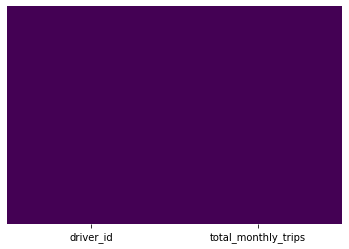

In [ ]:
#visual representation
sns.heatmap(df_completed.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [ ]:
df_ride.isnull().sum()

ride_id      0
driver_id    0
dtype: int64

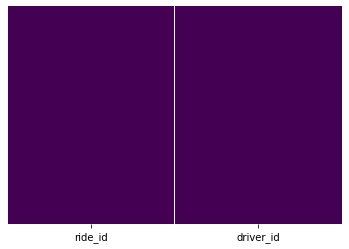

In [ ]:
#visual representation
sns.heatmap(df_ride.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_request.isnull().sum()

day_of_week              0
Hour                     0
Minute                   0
ride_id                  0
passenger_id             0
driver_id                0
undiscounted_fare    49600
rating               78212
ride_duration        49586
ride_distance        49600
status                   0
dtype: int64

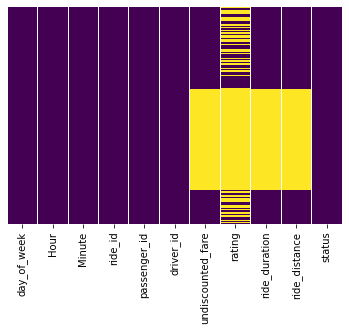

In [ ]:
#visual representation
sns.heatmap(df_request.isnull(),yticklabels=False,cbar=False,cmap='viridis')

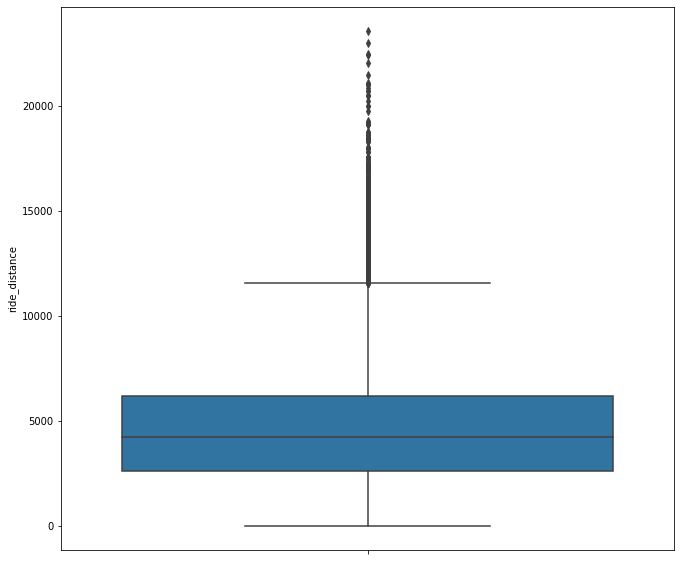

In [ ]:
fig, axes = plt.subplots(figsize=(11, 10), sharex=True)
sns.boxplot(data=df_request, y='ride_distance');

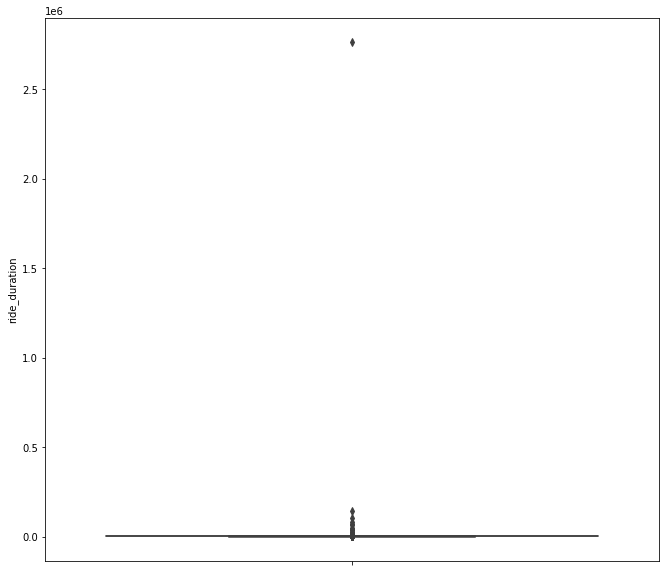

In [ ]:
fig, axes = plt.subplots(figsize=(11, 10), sharex=True)
sns.boxplot(data=df_request, y='ride_duration');

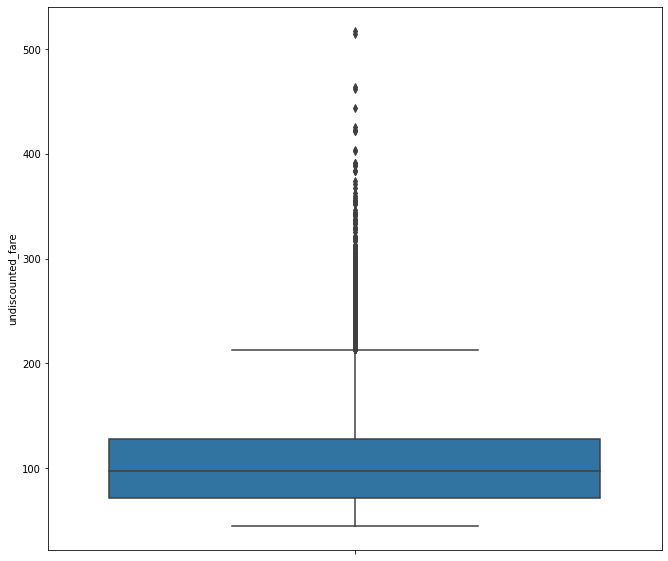

In [ ]:
fig, axes = plt.subplots(figsize=(11, 10), sharex=True)
sns.boxplot(data=df_request, y='undiscounted_fare');

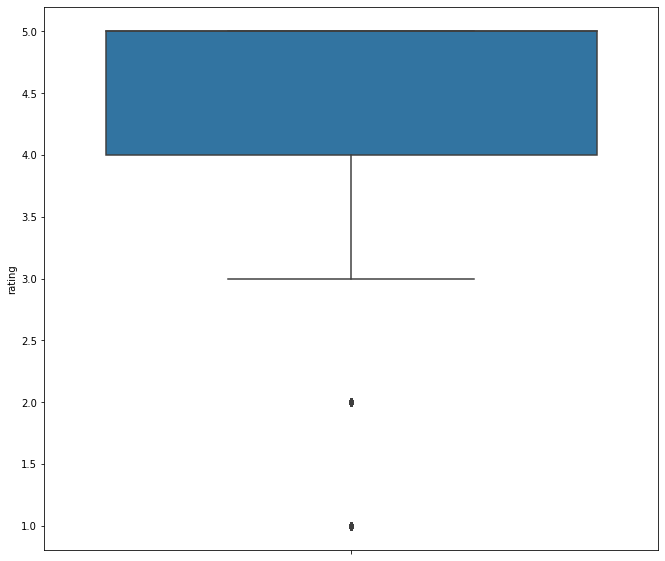

In [ ]:
fig, axes = plt.subplots(figsize=(11, 10), sharex=True)
sns.boxplot(data=df_request, y='rating');

In [ ]:
df_request['ride_distance'] = df_request['ride_distance'].fillna(df_request['ride_distance'].median())
df_request['ride_duration'] = df_request['ride_duration'].fillna(df_request['ride_duration'].mean())
df_request['undiscounted_fare'] = df_request['undiscounted_fare'].fillna(df_request['undiscounted_fare'].median())
df_request['rating'] = df_request['rating'].fillna(df_request['rating'].mean())

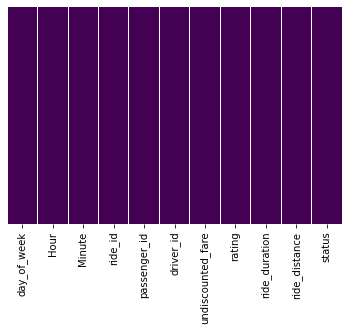

In [ ]:
#visual representation
sns.heatmap(df_request.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### **Checking For Duplicate data**

In [ ]:
df_request.duplicated().sum()

0

In [ ]:
df_completed.duplicated().sum()

0

In [ ]:
df_ride.duplicated().sum()

0

COMPLETED    56538
CANCELED     49601
Name: status, dtype: int64
Class 1: 56538
Class 0: 49601
Proportion: 1.14 : 1


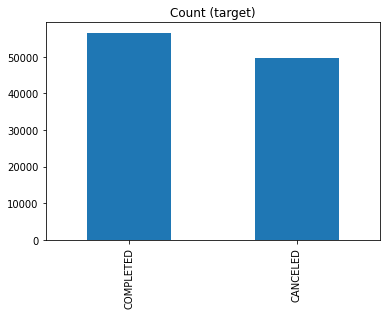

In [ ]:

target_count = df_request.status.value_counts()
print(target_count)
print('Class 1:', target_count["COMPLETED"])
print('Class 0:', target_count["CANCELED"])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [ ]:
df_request['ride_id'].is_unique

False

In [ ]:
df_request['driver_id'].is_unique

False

In [ ]:
dups_shape = df_ride.pivot_table(columns=['ride_id'], aggfunc='size')
print (dups_shape)

ride_id
7.80E+06     1
7.80E+07     2
7.80E+122    5
7.80E+133    1
7.80E+134    3
            ..
8.00E+06     3
8.00E+07     1
8.00E+08     1
8.00E+09     2
8.00E+12     2
Length: 103962, dtype: int64


In [ ]:
dups_shape = df_ride.pivot_table(columns=['driver_id'], aggfunc='size')
print (dups_shape)

driver_id
2869108      1
2869204     99
2869278     11
2870173    285
2886584    189
          ... 
5441296      4
5441518     10
5441667      4
5441669      4
5441700      3
Length: 3538, dtype: int64


In [ ]:
day_of_week = list(df_request['day_of_week'])
print(len(day_of_week))



106139


### **Driver profiling Analysis**

In [ ]:
df_request['driver_id'].is_unique

False

In [ ]:
df_completed['driver_id'].is_unique

True

 **driver_ride_assignments.csv file contains the driver assignments for all requests in the
one week time period.**

**Request assign per driver**

In [ ]:
from itertools import groupby
def Get_assign_request(lst1,lst2):
  count=0
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        count+=1
    X.append(count)
    count=0

  return X

In [ ]:
df_ride['driver_id'].is_unique

False

In [ ]:
ride_driver=list(df_ride['driver_id'])
request_driver=list(df_request['driver_id'])
driver_id= list(df_ride.driver_id.unique())
print(len(ride_driver))
print(len(request_driver))
print(len(driver_id))

238559
106139
3538


In [ ]:
assign_request= Get_assign_request(driver_id,ride_driver)

In [ ]:
print(len(assign_request))

3538


**Completed request per driver:**

In [ ]:
request_status=list(df_request['status'])

In [ ]:
print(len(request_status))

106139


In [ ]:
from itertools import groupby
def Completed_riding_request(lst1,lst2,lst3):
  count=0
  count_comp=[]
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        ind=[a for a, b in enumerate(lst2) if b == i]
    X.append(ind)

  for i in X:
    Sublst=i
    for j in Sublst:
      if(lst3[j]=="COMPLETED"):
        count+=1
    count_comp.append(count)
    count=0


  return count_comp

In [ ]:
completed_riding_request= Completed_riding_request(driver_id,request_driver,request_status)

In [ ]:
 print(completed_riding_request)

[43, 30, 39, 25, 26, 3, 29, 36, 32, 25, 30, 5, 15, 0, 3, 16, 16, 48, 68, 71, 2, 72, 29, 46, 57, 50, 4, 3, 0, 20, 47, 6, 6, 20, 71, 40, 0, 27, 0, 11, 29, 5, 2, 11, 11, 0, 2, 17, 18, 107, 8, 17, 51, 8, 44, 11, 101, 33, 11, 11, 23, 23, 24, 7, 0, 35, 19, 6, 27, 81, 6, 30, 28, 33, 14, 27, 26, 8, 33, 40, 9, 11, 5, 26, 0, 26, 31, 31, 5, 7, 6, 4, 55, 58, 40, 11, 34, 46, 13, 70, 27, 60, 16, 12, 30, 35, 51, 12, 4, 37, 30, 25, 44, 33, 32, 7, 16, 32, 3, 60, 28, 14, 121, 9, 84, 63, 29, 29, 29, 23, 37, 50, 27, 29, 69, 19, 67, 24, 29, 7, 62, 2, 44, 2, 38, 97, 20, 16, 48, 19, 46, 24, 28, 37, 80, 8, 11, 16, 39, 19, 85, 23, 28, 3, 43, 6, 30, 2, 8, 8, 35, 3, 7, 55, 33, 12, 17, 48, 54, 42, 39, 63, 12, 0, 59, 23, 32, 87, 1, 46, 8, 58, 21, 82, 13, 6, 35, 22, 3, 16, 31, 33, 42, 12, 30, 1, 51, 7, 38, 43, 14, 91, 14, 30, 25, 25, 90, 54, 17, 16, 37, 27, 39, 56, 57, 35, 83, 12, 71, 62, 3, 54, 4, 1, 33, 12, 28, 2, 19, 25, 18, 19, 5, 14, 31, 5, 4, 72, 23, 70, 23, 19, 13, 1, 16, 29, 15, 28, 0, 46, 37, 14, 74, 67, 1

In [ ]:


raw_data ={
            'Driver_ID': driver_id,
            'total_assigned_requests':assign_request,
            'total_completed_trips':completed_riding_request
            }
df_performance=pd.DataFrame(raw_data,columns=['Driver_ID','total_assigned_requests','total_completed_trips'])


In [ ]:
df_performance['Assignment_to_completion_ratio']  = round(df_performance['total_completed_trips']/ df_performance['total_assigned_requests'], 2)

print(df_performance)
print("ok")

      Driver_ID  ...  Assignment_to_completion_ratio
0       4922405  ...                            0.19
1       5332197  ...                            0.17
2       5303157  ...                            0.13
3       3355215  ...                            0.17
4       5265495  ...                            0.22
...         ...  ...                             ...
3533    4999922  ...                            1.00
3534    5346345  ...                            0.00
3535    3886345  ...                            0.00
3536    4105624  ...                            0.00
3537    5305051  ...                            0.00

[3538 rows x 4 columns]
ok


In [ ]:
ride_duration=list(df_request['ride_duration'])
ride_distance=list(df_request['ride_distance'])

In [ ]:
import math
def Ride_distance_Op(lst1,lst2,lst3):
  l=[]
  mean=[]
  Max=[]
  Min=[]
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        ind=[a for a, b in enumerate(lst2) if b == i]
    X.append(ind)

  print(X)

  for i in X:
    Sublst=i
    for j in Sublst:
      l.append(lst3[j])
    m=math.floor(sum(l)/len(l))
    mean.append(m)
    Max.append(max(l))
    Min.append(min(l))
  return mean,Max,Min

In [ ]:
Average_ride_distance,Maximum_ride_distance,Minimum_ride_distance= Ride_distance_Op(driver_id,request_driver,ride_distance)

[[2250, 2467, 5804, 6058, 7673, 9383, 10434, 10582, 11376, 11428, 12084, 13111, 14062, 15056, 17765, 17875, 19212, 19687, 21023, 23351, 24569, 24736, 24792, 25405, 25473, 26717, 29131, 30309, 30506, 31655, 32031, 33481, 33895, 34669, 35787, 36726, 37030, 38382, 39905, 40808, 40859, 45872, 45900, 46737, 48902, 50603, 52149, 52304, 54353, 54357, 55431, 55640, 55641, 56270, 56970, 58285, 58744, 61684, 62746, 63124, 65895, 66753, 68217, 69260, 69776, 70677, 70869, 72031, 73004, 73536, 74183, 76053, 76057, 76087, 76588, 77081, 77421, 78196, 79087, 79224, 79295, 80874, 81203, 83072, 85524, 86851, 88003, 88015, 89068, 99492, 103258, 103685, 103896], [480, 4663, 5175, 5916, 5982, 6060, 7863, 11907, 12387, 12473, 13948, 14052, 15542, 16716, 17841, 20359, 20402, 21751, 21849, 21960, 25625, 27217, 30261, 33980, 38434, 40883, 42330, 42367, 43377, 44198, 44420, 50983, 51410, 52555, 52902, 53969, 56920, 58899, 60355, 61758, 62295, 62808, 66956, 67977, 69226, 70010, 70848, 71940, 73328, 75204, 77713,

In [ ]:
print(len(Average_ride_distance))

3538


In [ ]:
import math
def Ride_duration_Op(lst1,lst2,lst3):
  l=[]
  mean=[]
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        ind=[a for a, b in enumerate(lst2) if b == i]
    X.append(ind)

  print(X)

  for i in X:
    Sublst=i
    for j in Sublst:
      l.append(lst3[j])
    m=math.floor(int(sum(l)/len(l)))
    mean.append(m)

    print("\n")
  return mean

In [ ]:
Average_ride_duration= Ride_duration_Op(driver_id,request_driver,ride_duration)

Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [ ]:
print(len(Average_ride_duration))

3538


In [ ]:
import math
def Avg_Rating_Op(lst1,lst2,lst3):
  l=[]
  mean=[]
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        ind=[a for a, b in enumerate(lst2) if b == i]
    X.append(ind)

  print(X)

  for i in X:
    Sublst=i
    for j in Sublst:
      l.append(lst3[j])
    m=math.floor(int(sum(l)/len(l)))
    mean.append(m)

    print("\n")
  return mean

In [ ]:
rating=list(df_request['rating'])
Average_rating= Ride_duration_Op(driver_id,request_driver,rating)

Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [ ]:
print(len(Average_rating))

3538


In [ ]:
import math
def Avg_undiscounted_fare(lst1,lst2,lst3):
  l=[]
  mean=[]
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        ind=[a for a, b in enumerate(lst2) if b == i]
    X.append(ind)

  print(X)

  for i in X:
    Sublst=i
    for j in Sublst:
      l.append(lst3[j])
    m=math.floor(int(sum(l)/len(l)))
    mean.append(m)

    print("\n")
  return mean

In [ ]:
undiscounted_fare=list(df_request['undiscounted_fare'])
Avg_undiscounted_fare= Ride_duration_Op(driver_id,request_driver,undiscounted_fare)

Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [ ]:
print(len(Avg_undiscounted_fare))

3538


In [ ]:
import math
def target_label(lst1,lst2,lst3):
  target=[]
  X=[]
  for i in lst1:
    for j in lst2:
      if(i==j):
        ind=[a for a, b in enumerate(lst2) if b == i]
    X.append(ind)

  print(X)

  for i in X:
    Sublst=i
    for j in Sublst:
      l=lst3[j]
    target.append(l)
  return target

In [ ]:
complete_driver= list(df_completed['driver_id'])
total_monthly_trips= list(df_completed['total_monthly_trips'])

In [ ]:
target_label= target_label(driver_id,complete_driver,total_monthly_trips)

[[3884], [984], [3796], [3931], [657], [2386], [3431], [3310], [1459], [2794], [167], [2833], [2374], [345], [797], [536], [536], [1058], [1892], [2915], [410], [528], [1585], [1420], [3274], [2911], [3206], [4440], [4118], [3816], [4359], [1652], [1846], [1558], [592], [552], [3665], [1928], [1928], [3360], [1500], [1160], [4701], [4275], [4057], [3535], [4385], [227], [1440], [555], [3385], [4448], [1906], [2568], [2347], [236], [4316], [1035], [2505], [2036], [676], [492], [2309], [1069], [1069], [3299], [2599], [1168], [3968], [1391], [3588], [24], [2431], [1124], [2546], [615], [767], [3462], [1456], [3979], [4171], [4459], [2390], [3459], [4627], [3336], [4296], [7], [2579], [3824], [2042], [36], [103], [3380], [161], [115], [518], [1436], [1628], [2313], [98], [121], [2469], [4409], [1881], [1113], [116], [2968], [4602], [3817], [4688], [2468], [177], [612], [4286], [3471], [49], [1030], [3689], [3325], [2798], [40], [996], [3138], [2812], [2960], [170], [3591], [505], [1916], [

In [ ]:

df_performance['Average_Ride_Distance']  = Average_ride_distance
df_performance['Average_Rating']  = Average_rating
df_performance['Average_Undiscounted_Fare']  = Avg_undiscounted_fare
df_performance['Average_Ride_Duration']  = Average_ride_duration
df_performance['Total_Trip']  = target_label
df_performance.to_csv('/content/drive/My Drive/pathao_assignment/Driver_Profilling_Dataset.csv',index=False)
print(df_performance)
print("ok")

      Driver_ID  total_assigned_requests  ...  Average_Ride_Duration  Total_Trip
0       4922405                      228  ...                    983         176
1       5332197                      176  ...                   1029          80
2       5303157                      293  ...                    907         153
3       3355215                      147  ...                    915         119
4       5265495                      116  ...                    925         104
...         ...                      ...  ...                    ...         ...
3533    4999922                        1  ...                   1025          12
3534    5346345                        1  ...                   1025         111
3535    3886345                        1  ...                   1025          13
3536    4105624                        1  ...                   1025           4
3537    5305051                        1  ...                   1025          20

[3538 rows x 9 columns]
ok


In [ ]:
feature=['Assignment_to_completion_ratio','Average_Ride_Distance','Average_Rating','Average_Undiscounted_Fare','Average_Ride_Duration']

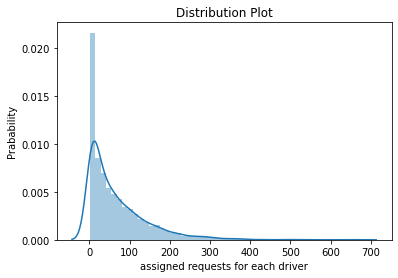

In [ ]:
sns.distplot(df_performance['total_assigned_requests'])
plt.title('Distribution Plot')
plt.xlabel('assigned requests for each driver')
plt.ylabel('Prabability') 
plt.show()

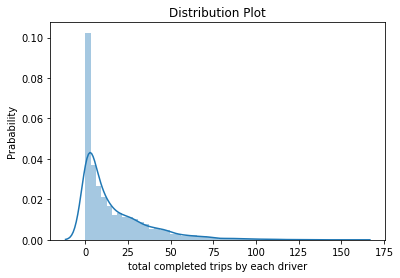

In [ ]:
sns.distplot(df_performance['total_completed_trips'])
plt.title('Distribution Plot')
plt.xlabel('total completed trips by each driver')
plt.ylabel('Prabability') 
plt.show()

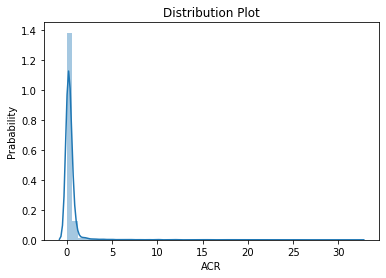

In [ ]:
sns.distplot(df_performance['Assignment_to_completion_ratio'])
plt.title('Distribution Plot')
plt.xlabel('ACR')
plt.ylabel('Prabability') 
plt.show()

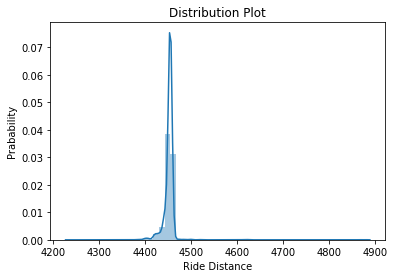

In [ ]:
sns.distplot(df_performance['Average_Ride_Distance'])
plt.title('Distribution Plot')
plt.xlabel('Ride Distance')
plt.ylabel('Prabability') 
plt.show()

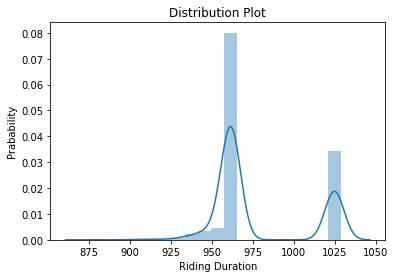

In [ ]:
sns.distplot(df_performance['Average_Ride_Duration'])
plt.title('Distribution Plot')
plt.xlabel('Riding Duration')
plt.ylabel('Prabability') 
plt.show()

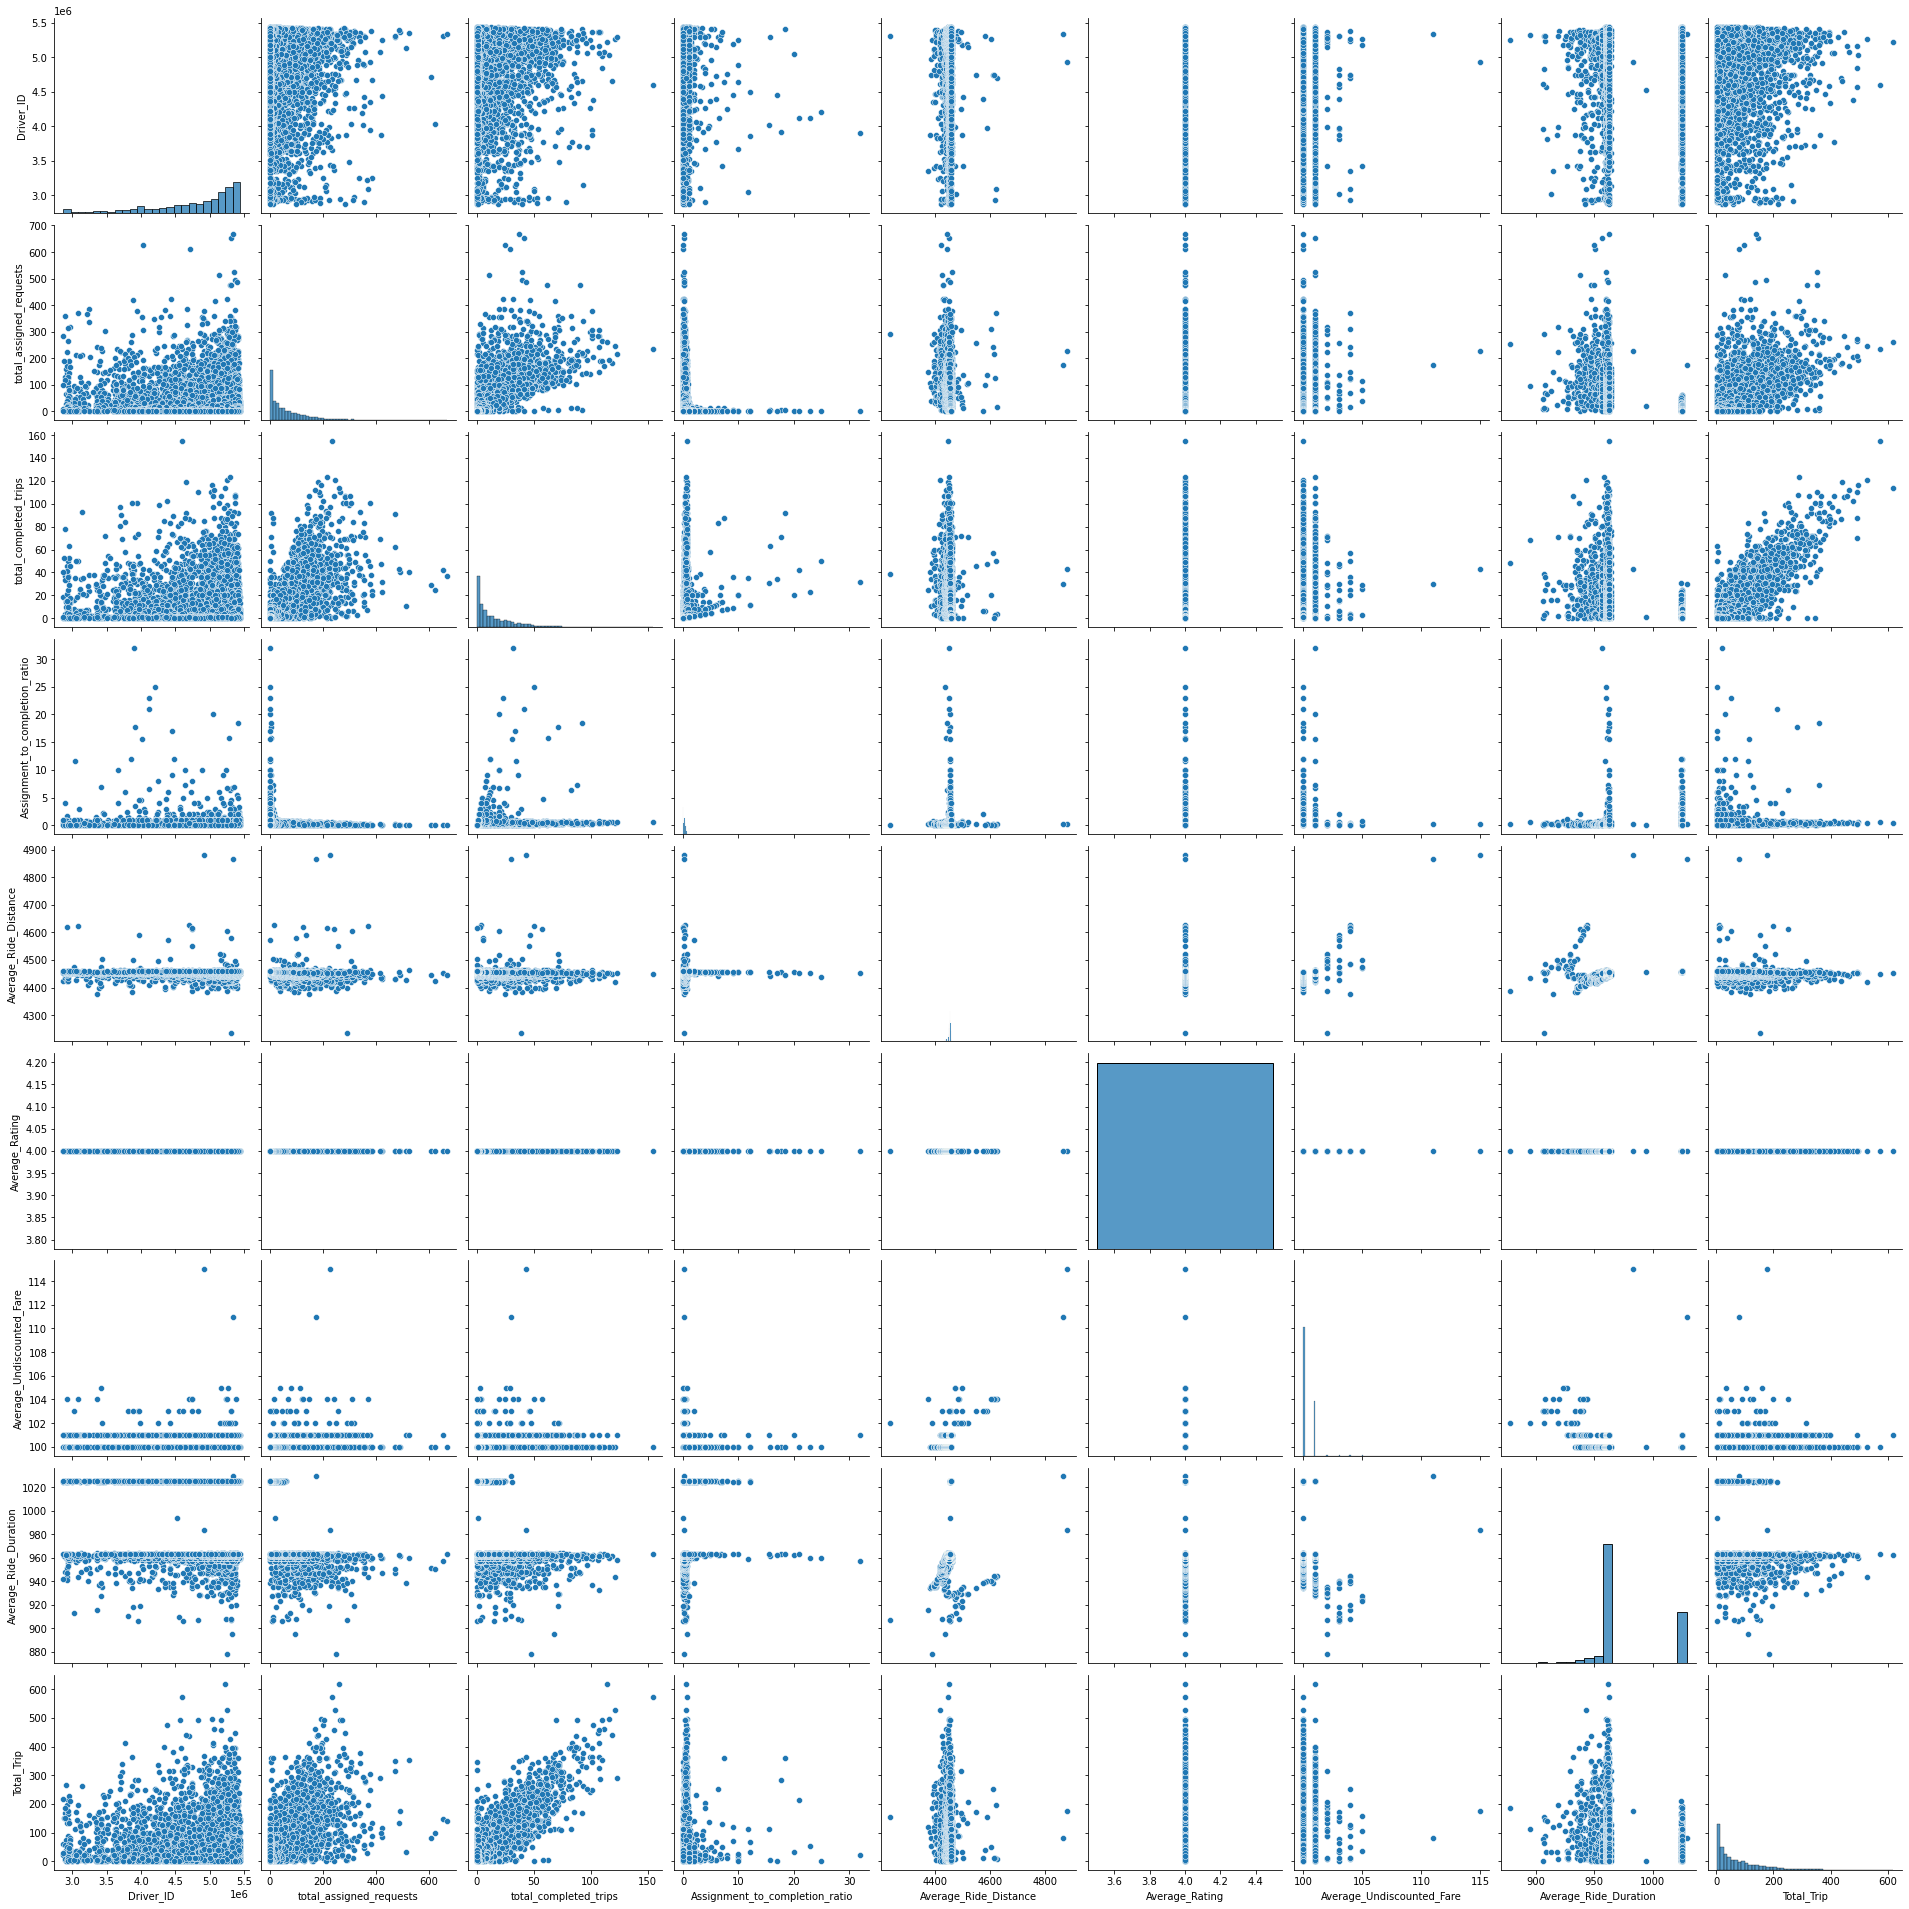

In [ ]:
sns.pairplot(df_performance,size=3)

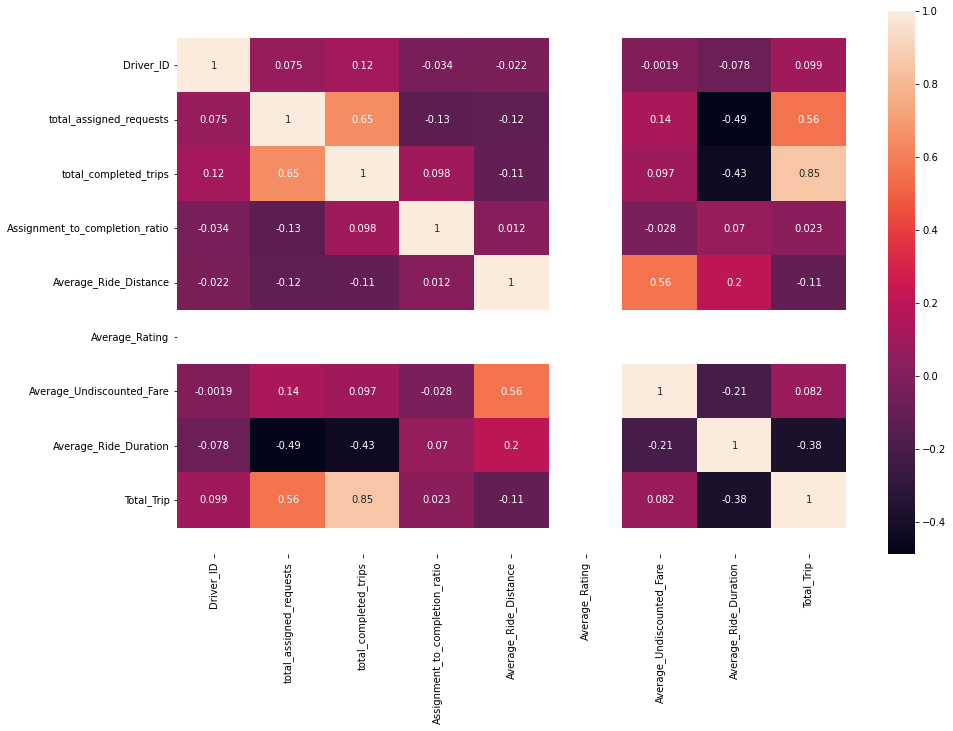

In [ ]:

fig, axes = plt.subplots(figsize=(15, 10), sharex=True)
ax=sns.heatmap(df_performance.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

### **Observations:**

* By observing the multivariate analysis from the heapmap() we see that the distribution of the metrics are not normal and there existslots of outliers in the dataset.
*	The correlation between Average ride distance and number of total trip for a particular driver id is negative, which means if the ride distance is small then the possibility of monthly total trip for a driver is high.
*	The correlation between Average ride duration and number of total trip for a particular driver id is negative, which means if the ride duration is low then the possibility of monthly total trip for a driver is high. 
* 	Assignment to completion ratio and Total trip is positive. For obvious reason if the completion ratio is high then the total trip count end of the month will also be high. 

## **Thank You..!**
